# CA4

### Imports

In [2]:

import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd
import numpy as np
from scipy import stats

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.model_selection import StratifiedKFold





### Reading data

In [3]:
raw_train = pd.read_csv('train.csv', index_col=0)
raw_train.drop('index',inplace=True, axis=1)    
test_data = pd.read_csv('test.csv', index_col=0)
test_data.drop('index',inplace=True, axis=1)    
test_data.head()


,AFP (ng/mL),ALP (U/L),ALT (U/L),AST (U/L),Age,Albumin (g/dL),Alcohol_Use (yes/no),Bilirubin (mg/dL),CRP (mg/L),Diabetes (yes/no),...,Serum_Copper (μg/dL),Serum_Creatinine (mg/dL),Serum_Iron (μg/dL),Serum_Lactate (mmol/L),Serum_Urea (mg/dL),Serum_Zinc (μg/dL),TIBC (μg/dL),Transferrin_Saturation (%),WBC (10^9/L),pH
0,10.889731,1073.225118,128.902456,106.675435,51,4.000971,yes,1.022449,2.414993,no,...,90.654388,2.682107,85.327495,2.130148,14.920351,106.671168,233.450604,36.550557,19.326563,6.494922
1,9.336239,1265.556647,17.411855,11.417480,15,5.022483,no,0.306729,2.872989,no,...,130.082257,1.797770,168.429980,3.336129,11.822935,124.350374,385.361059,43.707058,5.127804,6.426953
2,9.596510,1248.856838,98.029030,111.589430,18,4.102368,no,0.496663,0.452532,no,...,96.513750,2.569339,80.862540,4.043553,17.444002,87.782518,307.868972,26.265245,4.247543,7.054559
3,7.874536,1151.339119,40.576883,-7.889038,33,4.228515,no,0.705237,2.376890,no,...,85.538603,2.146402,142.833106,3.103085,30.969093,67.967233,400.051137,35.703712,4.373614,5.834489
4,8.612401,1784.363119,30.359700,15.241851,39,4.200873,yes,0.640090,6.384251,no,...,139.213829,2.234448,54.671627,2.189221,37.196571,80.164147,324.338615,16.856342,4.886107,6.104516


### Data exploration and visualisation before cleaning

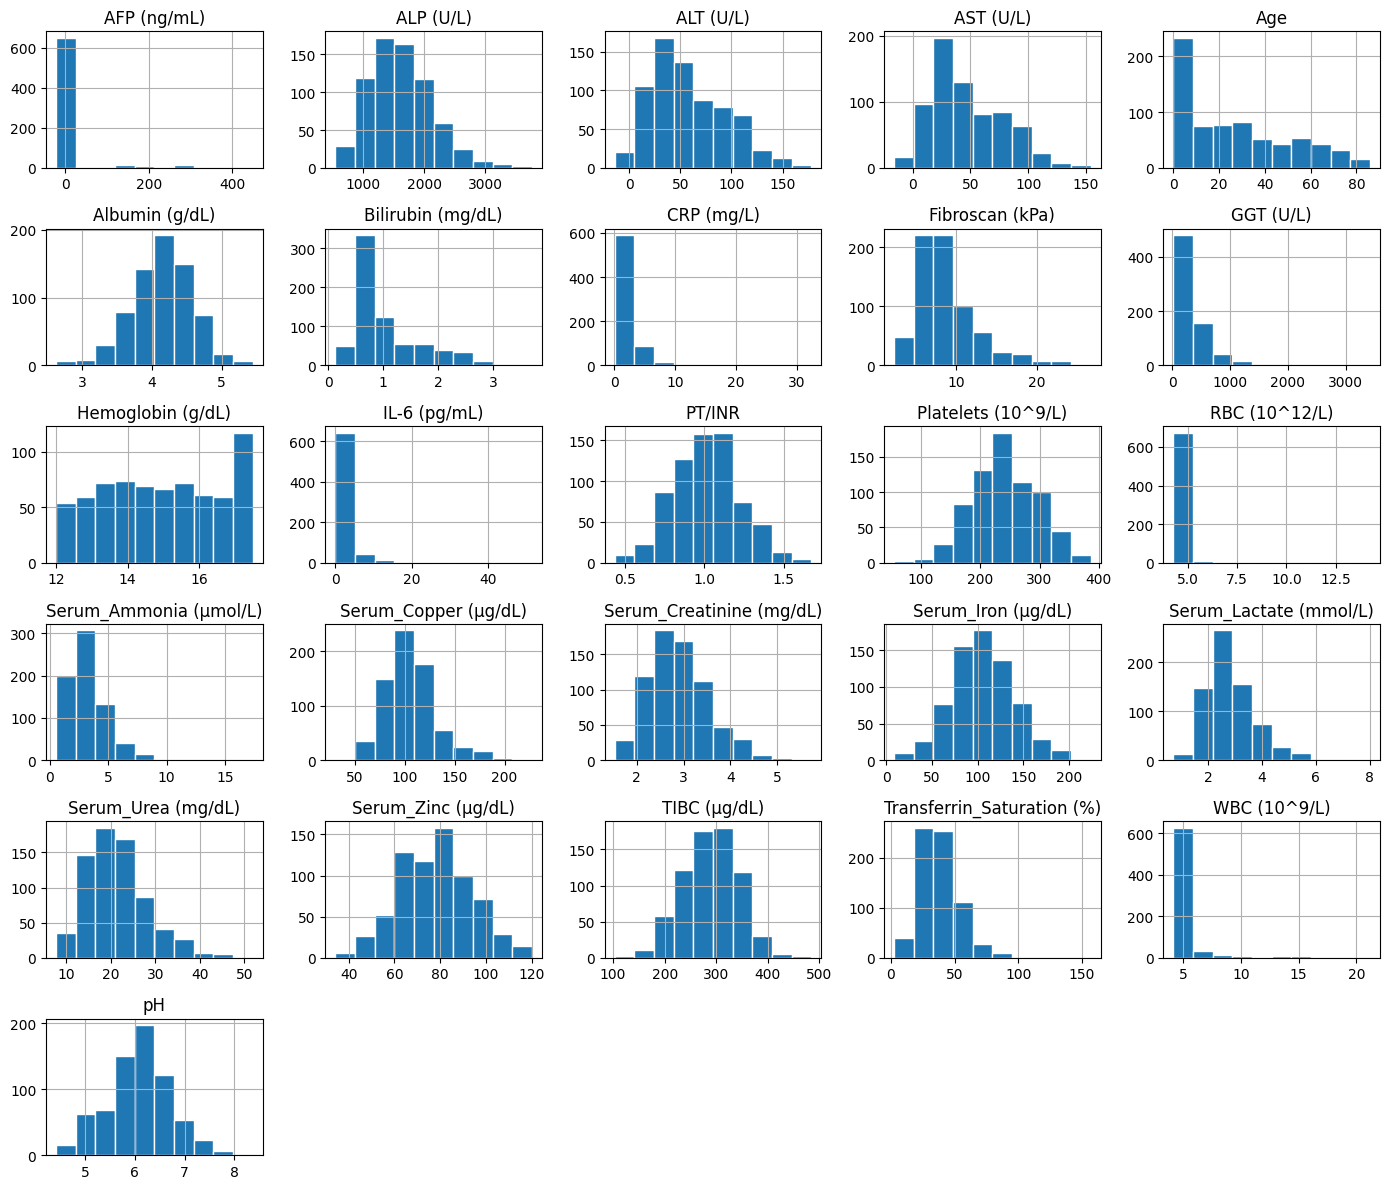

In [4]:
# Histogram 
raw_train.hist(figsize=(14,12) , edgecolor="white") # edgecolor makes it look nicer 
plt.tight_layout()
plt.show()

In [5]:
# Pairplot
#sns.pairplot(data=raw_train, hue = 'Diagnosis')
#plt.show()

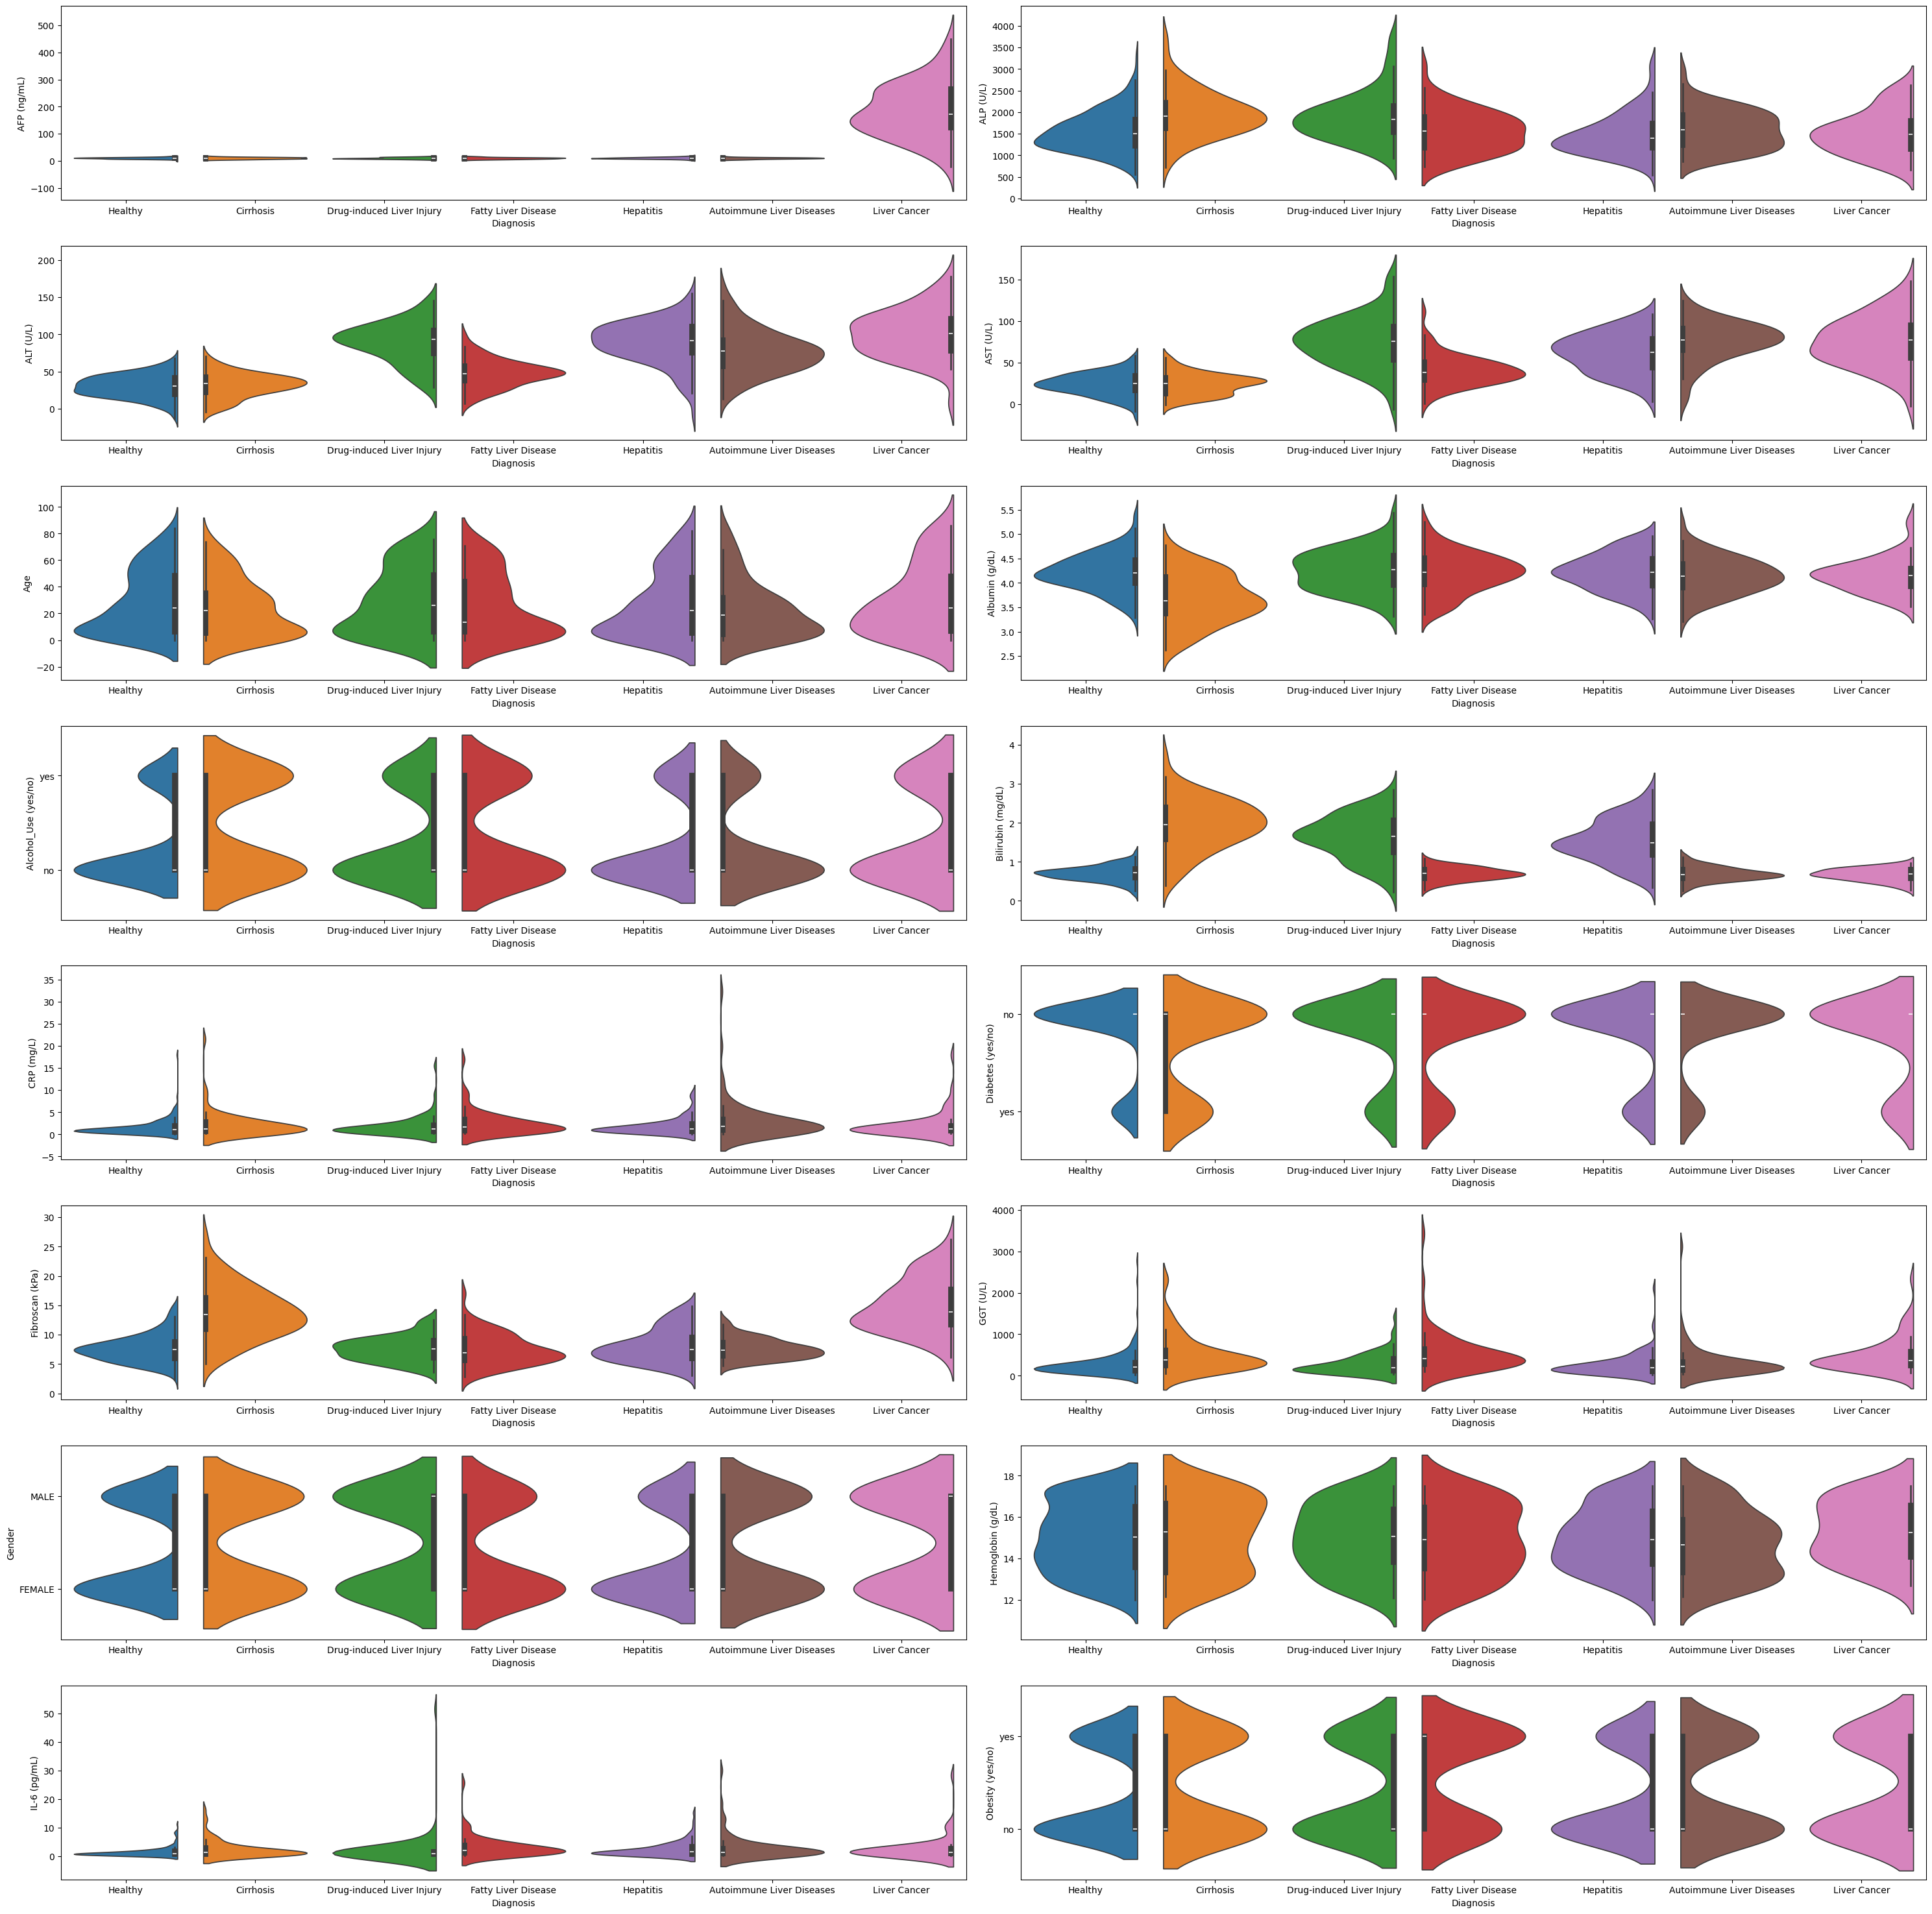

In [6]:
# violin plot
fig_violin, ax_violin = plt.subplots(nrows=8, ncols=2, figsize=(30,30))
plt.tight_layout(pad=3.0)

i = 0
for row in range(8):
    for col in range(2):
        sns.violinplot(ax=ax_violin[row, col], data=raw_train, x='Diagnosis', y=raw_train.columns[i], 
                       hue='Diagnosis', split=True)
        i += 1
        
plt.show()

In [7]:
# check for missing values
print(raw_train.isnull().sum())
raw_train.shape

AFP (ng/mL)                   0
ALP (U/L)                     0
ALT (U/L)                     0
AST (U/L)                     0
Age                           0
Albumin (g/dL)                0
Alcohol_Use (yes/no)          0
Bilirubin (mg/dL)             0
CRP (mg/L)                    0
Diabetes (yes/no)             0
Fibroscan (kPa)               0
GGT (U/L)                     0
Gender                        0
Hemoglobin (g/dL)             0
IL-6 (pg/mL)                  0
Obesity (yes/no)              0
PT/INR                        0
Platelets (10^9/L)            0
RBC (10^12/L)                 0
Serum_Ammonia (μmol/L)        0
Serum_Copper (μg/dL)          0
Serum_Creatinine (mg/dL)      0
Serum_Iron (μg/dL)            0
Serum_Lactate (mmol/L)        0
Serum_Urea (mg/dL)            0
Serum_Zinc (μg/dL)            0
TIBC (μg/dL)                  0
Transferrin_Saturation (%)    0
WBC (10^9/L)                  0
pH                            0
Diagnosis                     0
dtype: i

(703, 31)

There are not missing values

In [8]:
# counts the different diagnosis
print(raw_train['Diagnosis'].value_counts())


Diagnosis
Healthy                      250
Hepatitis                    113
Autoimmune Liver Diseases     79
Drug-induced Liver Injury     73
Cirrhosis                     71
Fatty Liver Disease           62
Liver Cancer                  55
Name: count, dtype: int64


### Data cleaning

In [9]:
# convert the categorical train data to numerical data
df = raw_train
columns_to_encode = ['Alcohol_Use (yes/no)','Diabetes (yes/no)', 'Gender','Obesity (yes/no)', 'Diagnosis']
le = LabelEncoder()
for col in columns_to_encode:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])
df

,AFP (ng/mL),ALP (U/L),ALT (U/L),AST (U/L),Age,Albumin (g/dL),Alcohol_Use (yes/no),Bilirubin (mg/dL),CRP (mg/L),Diabetes (yes/no),...,Serum_Creatinine (mg/dL),Serum_Iron (μg/dL),Serum_Lactate (mmol/L),Serum_Urea (mg/dL),Serum_Zinc (μg/dL),TIBC (μg/dL),Transferrin_Saturation (%),WBC (10^9/L),pH,Diagnosis
0,13.571425,1653.138489,40.405592,45.598427,4,4.477126,1,0.541997,1.002121,0,...,2.569954,97.242495,2.923385,26.696110,96.124260,315.439318,30.827639,4.180007,6.163600,4
1,13.649342,1940.518305,21.336986,34.064095,55,3.190724,1,1.199063,0.582746,0,...,3.024642,128.597676,2.719966,23.021218,50.554650,268.492437,47.896200,4.590995,5.244266,1
2,10.898943,1557.369920,29.665496,16.044488,30,4.506351,0,0.740952,1.670375,0,...,2.219844,98.026938,3.267757,20.123808,82.900681,312.107620,31.408057,4.524580,5.769592,4
3,13.872275,1273.840525,142.418649,64.204257,0,3.665655,1,1.939879,1.220646,0,...,1.704282,63.105133,1.937625,36.436855,72.360010,182.506010,34.577016,4.234483,5.982228,2
4,10.102457,1461.622515,22.437303,23.940205,59,4.005109,0,0.769535,0.139863,0,...,2.656926,89.966713,1.979801,20.036074,63.216136,212.261519,42.384844,4.306892,4.837404,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698,13.086307,1663.149063,94.844911,81.525503,82,3.893254,1,1.514709,4.102990,0,...,2.510571,71.561815,3.255364,13.806666,74.751383,331.761651,21.570249,4.239866,6.525677,5
699,12.425079,1580.772607,19.152473,29.765881,8,4.434494,1,2.497997,3.827726,0,...,3.267194,139.135093,3.741368,24.133150,51.577230,266.947184,52.120832,4.374619,6.071335,1
700,12.887508,1164.383286,116.825787,71.610295,14,4.002324,0,1.760204,2.456043,0,...,3.056218,141.278410,2.945887,13.363649,95.869655,260.085180,54.320054,4.369082,5.059313,5
701,8.947665,1178.449705,7.818343,46.739457,2,3.866326,0,0.552524,4.907847,0,...,2.322946,112.506385,2.180009,15.892570,72.641767,344.926350,32.617510,4.249171,6.546267,4


In [10]:
# convert the categorical test data to numerical data
columns_to_encode = ['Alcohol_Use (yes/no)','Diabetes (yes/no)', 'Gender','Obesity (yes/no)']
le = LabelEncoder()
for col in columns_to_encode:
    if test_data[col].dtype == 'object':
        test_data[col] = le.fit_transform(test_data[col])
test_data.head

<bound method NDFrame.head of      AFP (ng/mL)    ALP (U/L)   ALT (U/L)   AST (U/L)  Age  Albumin (g/dL)  \
0      10.889731  1073.225118  128.902456  106.675435   51        4.000971   
1       9.336239  1265.556647   17.411855   11.417480   15        5.022483   
2       9.596510  1248.856838   98.029030  111.589430   18        4.102368   
3       7.874536  1151.339119   40.576883   -7.889038   33        4.228515   
4       8.612401  1784.363119   30.359700   15.241851   39        4.200873   
..           ...          ...         ...         ...  ...             ...   
297    13.991297  1265.284634   45.899253    9.475574   24        3.425828   
298    11.508234  1186.968962   47.266044   35.344462    6        4.711807   
299    13.140138  1868.908324  102.069514   69.471781   31        4.334633   
300    11.416007  2827.241707   91.749886  109.187848    3        4.295762   
301    11.079043  1464.771470  112.422062   52.672839    9        4.441458   

     Alcohol_Use (yes/no)  Biliru

In [11]:
# Using Z-scores to filter out the outliers. Z-score < |3|
print(f'Shape of dataset before removing outliers{df.shape}')
z_scores = stats.zscore(df) # calculates z score
abs_z_scores = np.abs(z_scores)
not_outliers = (abs_z_scores < 3).all(axis=1)
cleaned = df[not_outliers]
print(f'Shape of dataset after removing outliers {cleaned.shape}')



Shape of dataset before removing outliers(703, 31)
Shape of dataset after removing outliers (548, 31)


### Data preprocessing and visualisation

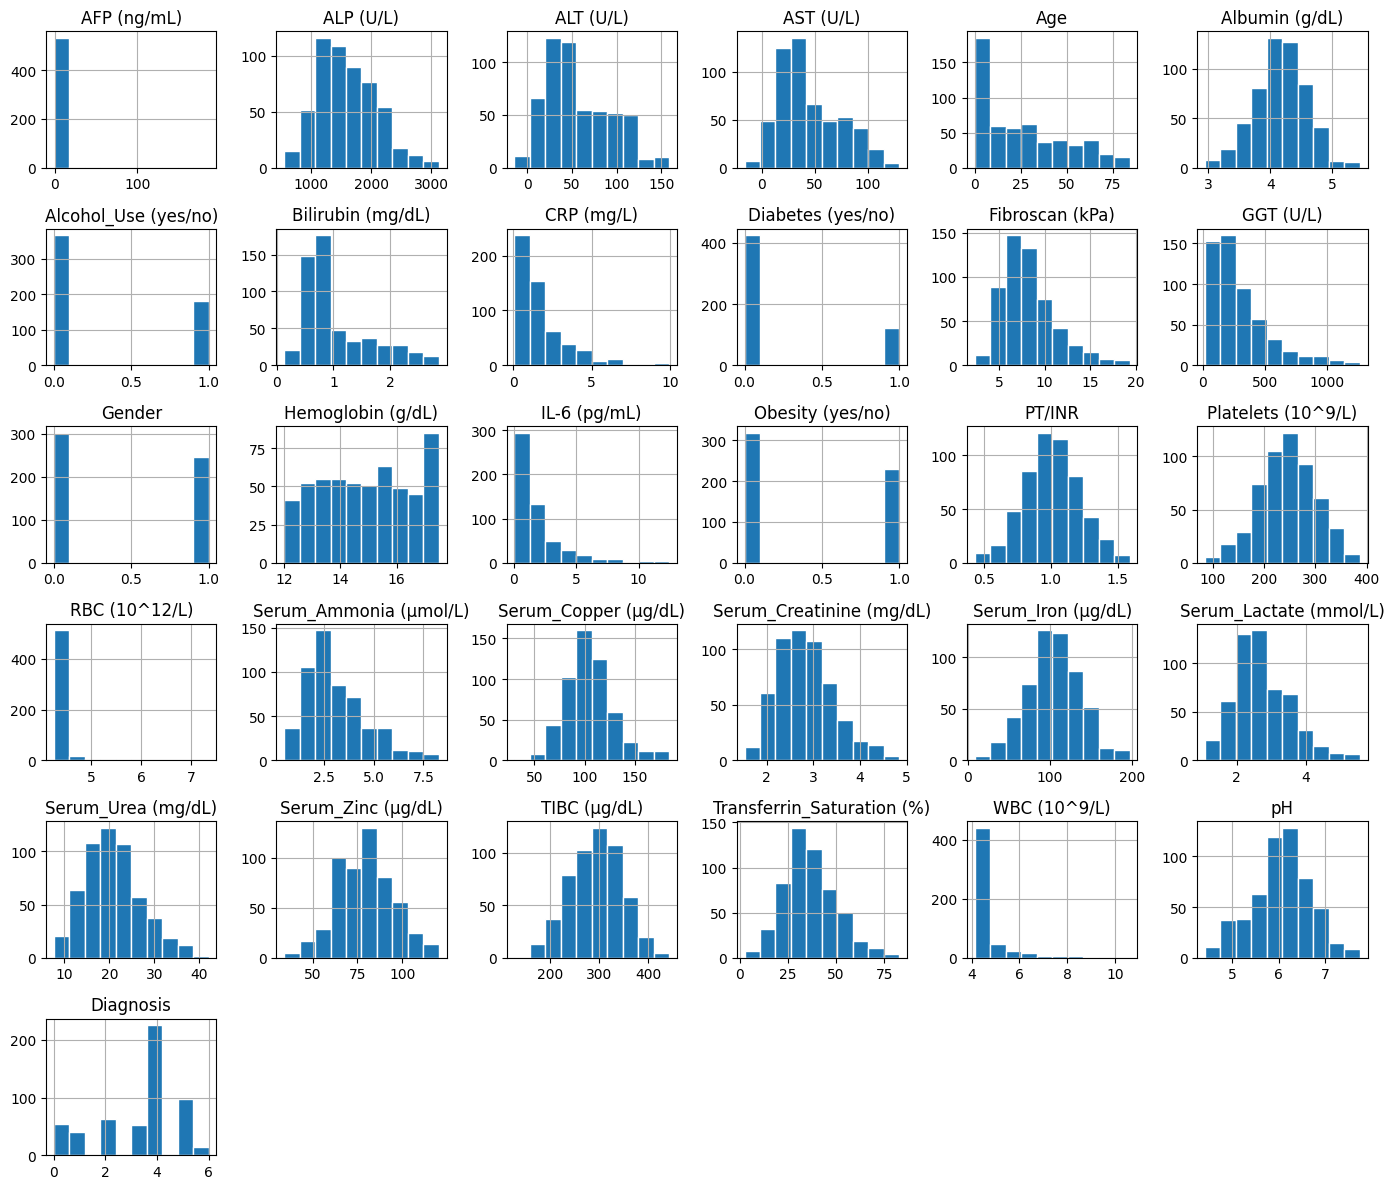

In [12]:
# Histogram 
cleaned.hist(figsize=(14,12) , edgecolor="white") # edgecolor makes it look nicer 
plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

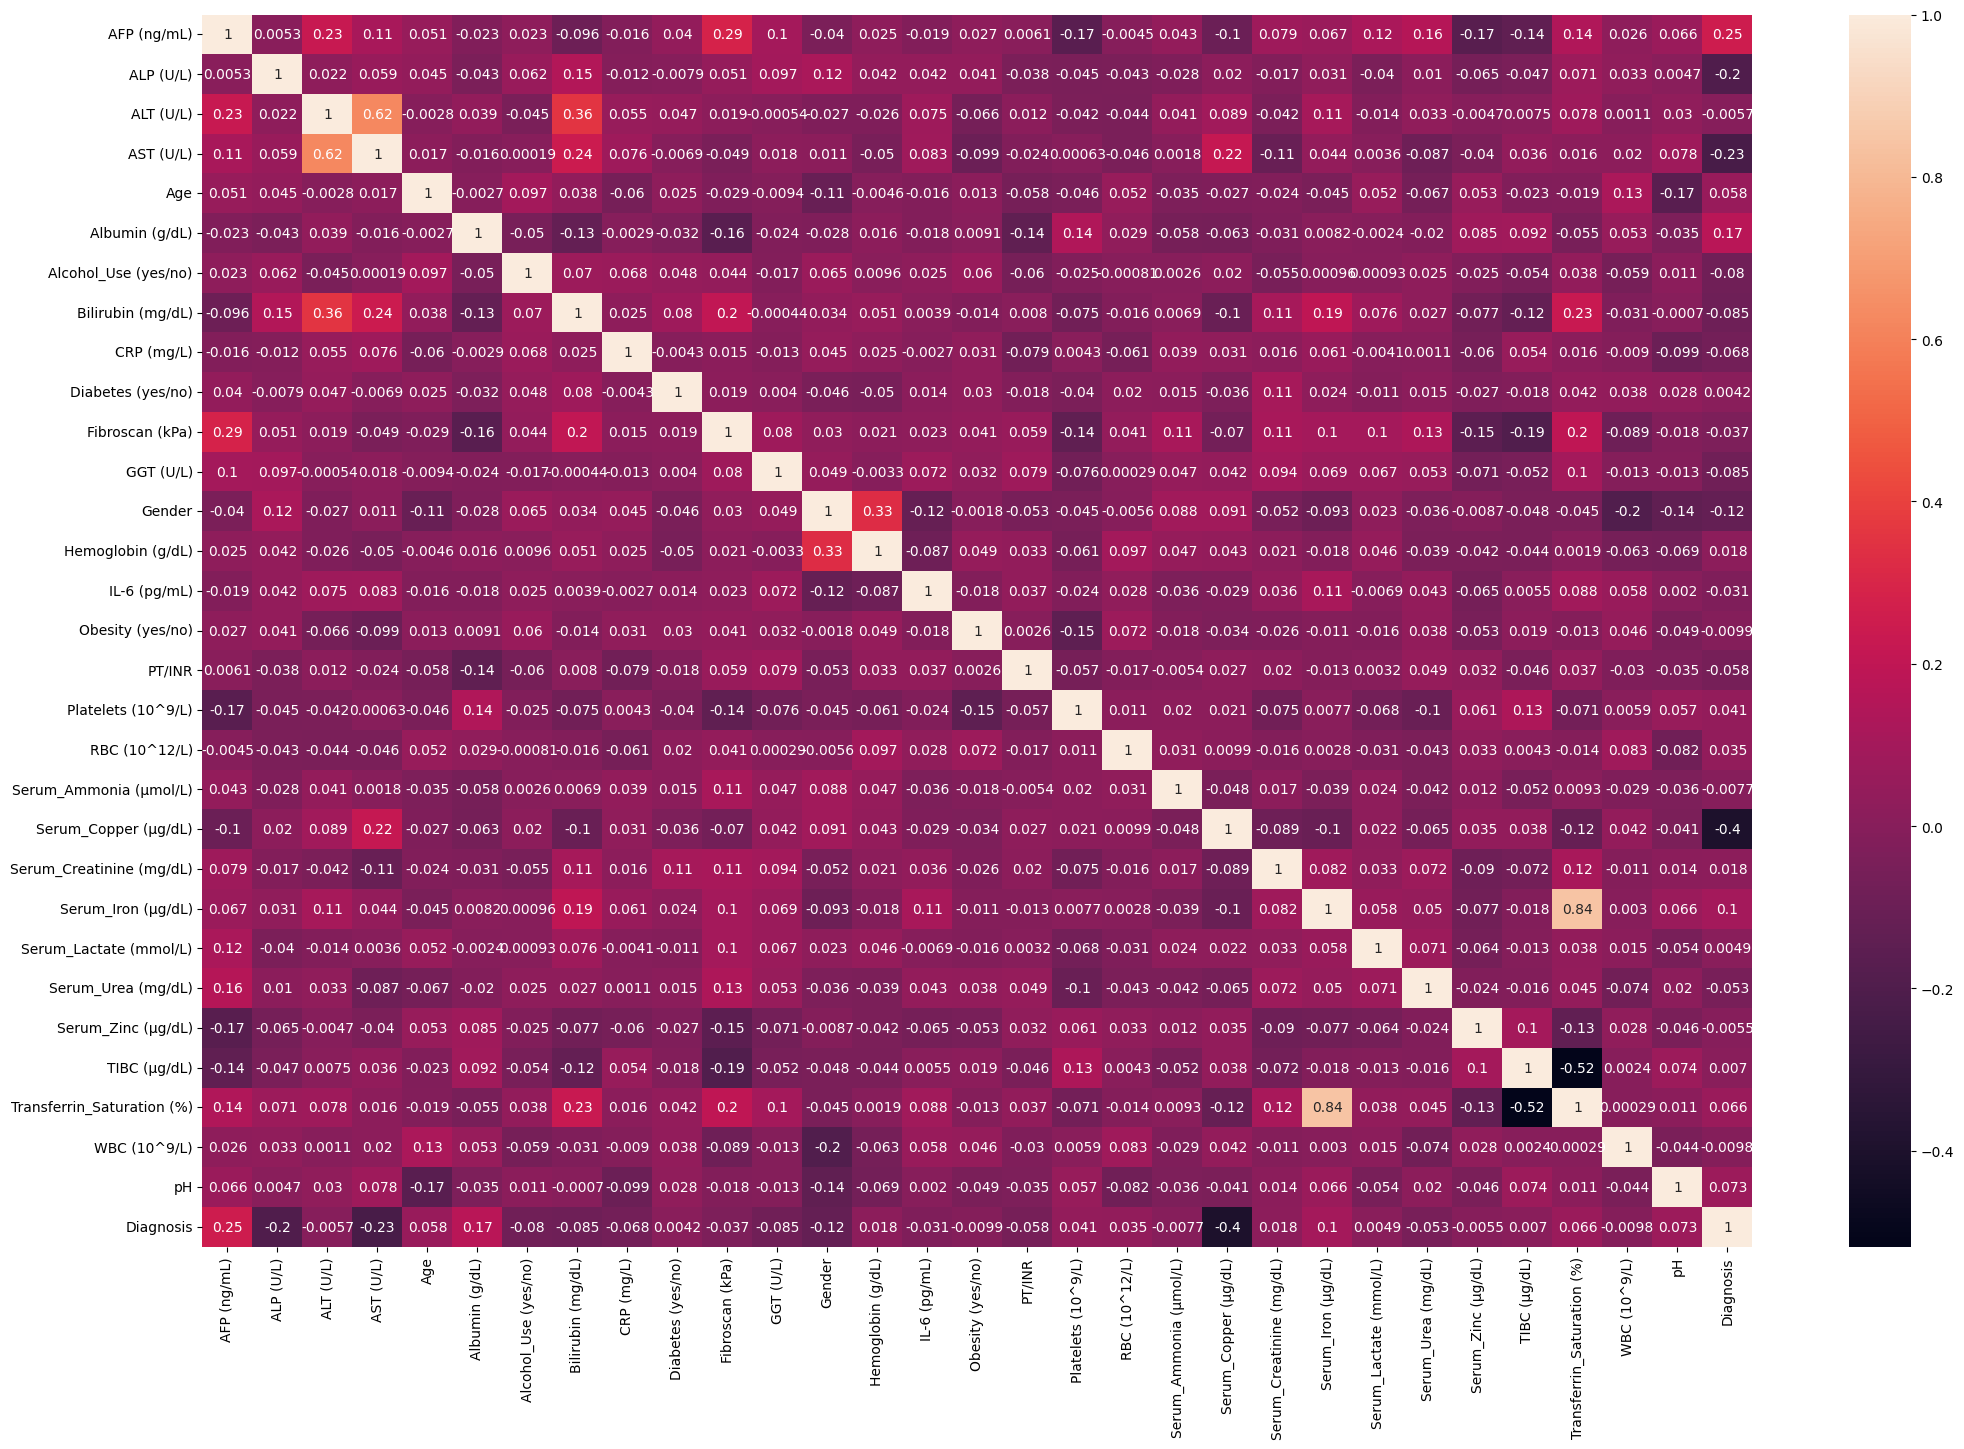

In [13]:
# Correlation matrix after cleaning
corr_matrix = cleaned.corr()
fig_corr, ax_corr = plt.subplots(figsize=(25,16))
sns.heatmap(data=corr_matrix,annot=True, ax=ax_corr)
plt.show

In [14]:
# convert the numeric data in the Diagnosis column to the original string values
Diagnosis = cleaned['Diagnosis']
reverse_label_mapping = {
    0: 'Autoimmune Liver Diseases',
    1: 'Chirrosis',
    2: 'Drug-induced Liver Injury',
    3: 'Fatty Liver Disease',
    4: 'Healthy',
    5: 'Hepatitis',
    6: 'Liver Cancer'
}

cleaned.loc[:, 'Diagnosis'] = [reverse_label_mapping[label] for label in cleaned['Diagnosis']]
cleaned.head()

/var/folders/qf/9lcflp0s1nq8l85_tw03dz180000gp/T/ipykernel_69019/3127876499.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['Healthy', 'Chirrosis', 'Healthy', 'Drug-induced Liver Injury', 'Healthy', 'Fatty Liver Disease', 'Hepatitis', 'Fatty Liver Disease', 'Healthy', 'Healthy', 'Healthy', 'Fatty Liver Disease', 'Autoimmune Liver Diseases', 'Healthy', 'Autoimmune Liver Diseases', 'Drug-induced Liver Injury', 'Hepatitis', 'Healthy', 'Healthy', 'Drug-induced Liver Injury', 'Drug-induced Liver Injury', 'Healthy', 'Hepatitis', 'Autoimmune Liver Diseases', 'Hepatitis', 'Healthy', 'Chirrosis', 'Autoimmune Liver Diseases', 'Healthy', 'Healthy', 'Fatty Liver Disease', 'Fatty Liver Disease', 'Healthy', 'Chirrosis', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Hepatitis', 'Healthy', 'Healthy', 'Fatty Liver Disease', 'Hepatitis', 'Hepatitis', 'Autoimmune Liver Diseases', 'Hepatitis', 'Hepatitis', 'Drug-induce

,AFP (ng/mL),ALP (U/L),ALT (U/L),AST (U/L),Age,Albumin (g/dL),Alcohol_Use (yes/no),Bilirubin (mg/dL),CRP (mg/L),Diabetes (yes/no),...,Serum_Creatinine (mg/dL),Serum_Iron (μg/dL),Serum_Lactate (mmol/L),Serum_Urea (mg/dL),Serum_Zinc (μg/dL),TIBC (μg/dL),Transferrin_Saturation (%),WBC (10^9/L),pH,Diagnosis
0,13.571425,1653.138489,40.405592,45.598427,4,4.477126,1,0.541997,1.002121,0,...,2.569954,97.242495,2.923385,26.696110,96.124260,315.439318,30.827639,4.180007,6.163600,Healthy
1,13.649342,1940.518305,21.336986,34.064095,55,3.190724,1,1.199063,0.582746,0,...,3.024642,128.597676,2.719966,23.021218,50.554650,268.492437,47.896200,4.590995,5.244266,Chirrosis
2,10.898943,1557.369920,29.665496,16.044488,30,4.506351,0,0.740952,1.670375,0,...,2.219844,98.026938,3.267757,20.123808,82.900681,312.107620,31.408057,4.524580,5.769592,Healthy
3,13.872275,1273.840525,142.418649,64.204257,0,3.665655,1,1.939879,1.220646,0,...,1.704282,63.105133,1.937625,36.436855,72.360010,182.506010,34.577016,4.234483,5.982228,Drug-induced Liver Injury
4,10.102457,1461.622515,22.437303,23.940205,59,4.005109,0,0.769535,0.139863,0,...,2.656926,89.966713,1.979801,20.036074,63.216136,212.261519,42.384844,4.306892,4.837404,Healthy


In [15]:
X = cleaned.drop(["Diagnosis"], axis=1) # contains all columns except traget column Diagnosis 
y = cleaned["Diagnosis"] # only contains the traget column Diagnosis



In [16]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

print("X_train: ",X_train.shape)
print("X_test: ",X_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

X_train:  (328, 30)
X_test:  (220, 30)
y_train:  (328,)
y_test:  (220,)


### Modelling

### pipline with regularization

In [17]:
# Create Pipeline
pipeline_reg = Pipeline([
    ('scaler', StandardScaler()),  # or any other dimension reduction method
    ('clf', LogisticRegression(max_iter=1000))  # Classifier with regularization
])

# Define Hyperparameters
parameters_reg = {
    'clf__C' : [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
}

# Grid Search for Hyperparameters
grid_search_reg = GridSearchCV(estimator=pipeline_reg, 
                  param_grid=parameters_reg, 
                  scoring='f1_macro', 
                  cv=5,
                  n_jobs=-1)

grid_search_reg.fit(X_train, y_train)

print(grid_search_reg.best_score_)
print(grid_search_reg.best_params_)

0.6448660321018546
{'clf__C': 1.0}


In [ ]:
best_estimator_reg = grid_search_reg.best_estimator_
best_estimator_reg.fit(X_train, y_train)
print('Accuracy: %.3f' % best_estimator_reg.score(X_test, y_test))

Accuracy: 0.705


In [ ]:
y_pred = best_estimator_reg.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[18  0  1  0  1  0  0]
 [ 0 12  0  0  1  2  0]
 [ 1  0  9  0  1 10  0]
 [ 4  1  0  7 12  1  0]
 [ 0  0  0  3 80  1  0]
 [ 3  1 13  2  5 22  0]
 [ 0  1  0  0  0  1  7]]


### Pipeline with kernel

In [20]:
pipeline_svc = Pipeline([
    ('scaler', StandardScaler()),
    ('reduce_dim', PCA()),
    ('clf', SVC())  
])

# Define Hyperparameters
parameters_svc = {
    'reduce_dim__n_components': [2, 5, 10, 20, 30],
    'clf__C' : [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
    'clf__kernel': ['linear', 'rbf'],
    'clf__gamma': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
}
# pipeline_svc.get_params()

# Cross-Validation
grid_search_svc = GridSearchCV(estimator=pipeline_svc, 
                  param_grid=parameters_svc, 
                  scoring='f1_macro', 
                  cv=6,
                  n_jobs=-1)
grid_search_svc.fit(X_train, y_train)

print(grid_search_svc.best_score_)
print(grid_search_svc.best_params_)

0.6734557550586381
{'clf__C': 0.1, 'clf__gamma': 0.0001, 'clf__kernel': 'linear', 'reduce_dim__n_components': 30}


In [21]:
# Hyperparameter Tuning
best_estimator_svc = grid_search_svc.best_estimator_
best_estimator_svc.fit(X_train, y_train)
print('Accuracy: %.3f' % best_estimator_svc.score(X_test, y_test))

Accuracy: 0.695


In [22]:
#Confusion Matrix
y_pred = best_estimator_svc.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[16  0  0  0  4  0  0]
 [ 0 13  0  0  1  1  0]
 [ 3  1  6  0  1 10  0]
 [ 5  1  0  2 16  1  0]
 [ 0  0  0  1 83  0  0]
 [ 3  1 13  2  2 25  0]
 [ 0  0  0  0  0  1  8]]


#### K-Nearest Neighbour

In [23]:
# Define a pipeline with StandardScaler, LDA, and KNeighborsClassifier
pipe_knn = Pipeline([('scaler', StandardScaler()), 
                     ('lda', LDA()), 
                     ('knn', KNeighborsClassifier())])

# Define a dictionary of hyperparameters to search over
param_grid_knn = {'knn__n_neighbors': [5, 10, 15, 20, 25],
                  'knn__leaf_size': [10, 20, 30, 40, 50],
                  'knn__weights': ['uniform', 'distance'],
                  'knn__p': [1, 2], # L1/L2
                  }

# Use GridSearchCV to search over hyperparameters for the KNeighborsClassifier
grid_search_knn = GridSearchCV(estimator=pipe_knn,        # Use the pipeline as the estimator
                        param_grid=param_grid_knn, # Search over the hyperparameters defined in the dictionary
                        scoring='f1_macro',        # Strategy to evaluate the performance of the cross-validated model
                        cv=6,                      # Perform 6-fold cross-validation
                        n_jobs=-1)                 

# Fit the grid search object on the training data
grid_search_knn.fit(X_train, y_train)

# Print the best score and best set of hyperparameters
print(grid_search_knn.best_score_)
print(grid_search_knn.best_params_)

0.6825486116453449
{'knn__leaf_size': 10, 'knn__n_neighbors': 10, 'knn__p': 2, 'knn__weights': 'distance'}


#### Random Forest

In [24]:
pipe_rf = Pipeline([('scaler', StandardScaler()), 
                     ('lda', LDA()), 
                     ('rf', RandomForestRegressor())])

# Define a dictionary of hyperparameters to search over
param_grid_rf = {'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [None, 10, 20, 30],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4]}

# Use GridSearchCV to search over hyperparameters for the KNeighborsClassifier
grid_search_rf = GridSearchCV(estimator=pipe_rf,        # Use the pipeline as the estimator
                        param_grid=param_grid_rf, # Search over the hyperparameters defined in the dictionary
                        scoring='f1_macro',        # Strategy to evaluate the performance of the cross-validated model
                        cv=6,                      # Perform 6-fold cross-validation
                        n_jobs=-1)                 

# Fit the grid search object on the training data
grid_search_rf.fit(X_train, y_train)

# Print the best score and best set of hyperparameters
print(grid_search_rf.best_score_)
print(grid_search_rf.best_params_)

ValueError: 
All the 648 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
648 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/73rabann/Desktop/DAT200/.venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/73rabann/Desktop/DAT200/.venv/lib/python3.11/site-packages/sklearn/base.py", line 1351, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/73rabann/Desktop/DAT200/.venv/lib/python3.11/site-packages/sklearn/pipeline.py", line 475, in fit
    self._final_estimator.fit(Xt, y, **last_step_params["fit"])
  File "/Users/73rabann/Desktop/DAT200/.venv/lib/python3.11/site-packages/sklearn/base.py", line 1351, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/73rabann/Desktop/DAT200/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py", line 424, in fit
    y = np.ascontiguousarray(y, dtype=DOUBLE)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'Healthy'


In [ ]:
# Hyperparameter Tuning
best_estimator_rf = grid_search_rf.best_estimator_
best_estimator_rf.fit(X_train, y_train)
print('Accuracy: %.3f' % best_estimator_rf.score(X_test, y_test))

Accuracy: 0.369


### Final evaluation

##### confusion matrix
from the confusion matrix it shows that a lot of labels is missclassied as    5: 'Hepatitis'

#### accuracy
the accuracy is low with all the piplines 

### Kaggle submission

In [ ]:
# Define a pipeline with StandardScaler, LDA, and KNeighborsClassifier
pipe_knn = Pipeline([('scaler', StandardScaler()), 
                     ('lda', LDA()), 
                     ('knn', KNeighborsClassifier())])

# Define a dictionary of hyperparameters to search over
param_grid_knn = {'knn__n_neighbors': [5, 10, 15, 20, 25],
                  'knn__leaf_size': [10, 20, 30, 40, 50],
                  'knn__weights': ['uniform', 'distance'],
                  'knn__p': [1, 2], # L1/L2
                  }

# Use GridSearchCV to search over hyperparameters for the KNeighborsClassifier
grid_search_knn = GridSearchCV(estimator=pipe_knn,        # Use the pipeline as the estimator
                        param_grid=param_grid_knn, # Search over the hyperparameters defined in the dictionary
                        scoring='f1_macro',        # Use accuracy as the scoring metric
                        cv=6,                      # Perform 6-fold cross-validation
                        n_jobs=-1)                 

# Fit the grid search object on the training data
grid_search_knn.fit(X_test, y_test)

# Print the best score and best set of hyperparameters
print(grid_search_knn.best_score_)
print(grid_search_knn.best_params_)

0.6997850509851472
{'knn__leaf_size': 10, 'knn__n_neighbors': 5, 'knn__p': 2, 'knn__weights': 'distance'}


In [26]:
y_pred = grid_search_reg.predict(test_data)
df_submission = pd.DataFrame({'Diagnosis': y_pred})
df_submission.reset_index(level=0, inplace=True)

df_submission.columns = ['index', 'Diagnosis']
df_submission.to_csv('submission_reg.csv', index=False)

In [ ]:
y_pred = grid_search_knn.predict(test_data)
df_submission = pd.DataFrame({'Diagnosis': y_pred})
df_submission.reset_index(level=0, inplace=True)

df_submission.columns = ['index', 'Diagnosis']
df_submission.to_csv('submission_knn.csv', index=False)

In [ ]:
y_pred = grid_search_svc.predict(test_data)
df_submission = pd.DataFrame({'Diagnosis': y_pred})
df_submission.reset_index(level=0, inplace=True)

df_submission.columns = ['index', 'Diagnosis']
df_submission.to_csv('submission_svc.csv', index=False)

In [ ]:
y_pred = grid_search_rf.predict(test_data)
df_submission = pd.DataFrame({'Diagnosis': y_pred})
df_submission.reset_index(level=0, inplace=True)

df_submission.columns = ['index', 'Diagnosis']
df_submission.to_csv('submission_rf.csv', index=False)

NameError: name 'grid_search_rf' is not defined

### ROC curve


In [ ]:
# convert diagnosis to not healthy and healthy
cleaned['Diagnosis'] = np.where(cleaned['Diagnosis'] == 'Healthy', 0, 1)
cleaned.head()

/var/folders/qf/9lcflp0s1nq8l85_tw03dz180000gp/T/ipykernel_60661/3461874841.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned['Diagnosis'] = np.where(cleaned['Diagnosis'] == 'Healthy', 0, 1)


,AFP (ng/mL),ALP (U/L),ALT (U/L),AST (U/L),Age,Albumin (g/dL),Alcohol_Use (yes/no),Bilirubin (mg/dL),CRP (mg/L),Diabetes (yes/no),...,Serum_Creatinine (mg/dL),Serum_Iron (μg/dL),Serum_Lactate (mmol/L),Serum_Urea (mg/dL),Serum_Zinc (μg/dL),TIBC (μg/dL),Transferrin_Saturation (%),WBC (10^9/L),pH,Diagnosis
0,13.571425,1653.138489,40.405592,45.598427,4,4.477126,1,0.541997,1.002121,0,...,2.569954,97.242495,2.923385,26.696110,96.124260,315.439318,30.827639,4.180007,6.163600,0
1,13.649342,1940.518305,21.336986,34.064095,55,3.190724,1,1.199063,0.582746,0,...,3.024642,128.597676,2.719966,23.021218,50.554650,268.492437,47.896200,4.590995,5.244266,1
2,10.898943,1557.369920,29.665496,16.044488,30,4.506351,0,0.740952,1.670375,0,...,2.219844,98.026938,3.267757,20.123808,82.900681,312.107620,31.408057,4.524580,5.769592,0
3,13.872275,1273.840525,142.418649,64.204257,0,3.665655,1,1.939879,1.220646,0,...,1.704282,63.105133,1.937625,36.436855,72.360010,182.506010,34.577016,4.234483,5.982228,1
4,10.102457,1461.622515,22.437303,23.940205,59,4.005109,0,0.769535,0.139863,0,...,2.656926,89.966713,1.979801,20.036074,63.216136,212.261519,42.384844,4.306892,4.837404,0


In [ ]:
X = cleaned.drop(["Diagnosis"], axis=1) # contains all columns except traget column Diagnosis 
y = cleaned["Diagnosis"] # only contains the traget column Diagnosis

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=43)



In [ ]:


pipe_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2)),
    ('clf', KNeighborsClassifier(leaf_size=10, n_neighbors=5, p=2, weights='distance'))
])

# Reduced variable set
print(X_train)

X_train2 = X_train.iloc[:, [29,30]]

    
# Cross-validation specification
cv = list(StratifiedKFold(n_splits=3).split(X_train, y_train))

fig = plt.figure(figsize=(7, 5))

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

# Loop through folds of CV
for i, (train, test) in enumerate(cv):
    probas = pipeline_svc.fit(X_train2[train],
                         y_train[train]).predict_proba(X_train2[test]) # Predict probability of classes

    # False Positive and True Positive Rates (thresholds for the decision function)
    fpr, tpr, thresholds = roc_curve(y_train[test],
                                     probas[:, 1],
                                     pos_label=1)
    # Add to mean True Predictive Rate in a smoothed variant (interpolated)
    mean_tpr += np.interp(mean_fpr, fpr, tpr)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,
             tpr,
             label='ROC fold %d (area = %0.2f)'
                   % (i+1, roc_auc))

plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='random guessing')

# Average True Positive Rate
mean_tpr /= len(cv)
mean_tpr[0] = 0.0
mean_tpr[-1] = 1.0
# Average AUC
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='mean ROC (area = %0.2f)' % mean_auc, lw=2)
plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

     AFP (ng/mL)    ALP (U/L)   ALT (U/L)   AST (U/L)  Age  Albumin (g/dL)  \
682     7.033383  1692.551063   26.614161   30.923410   69        4.566262   
379     8.171463  2284.659650   93.692872   81.550832   72        3.773955   
689    13.419636  1694.525043   35.077258   21.159782   47        4.727039   
505    17.589783   765.172797   17.236739   56.735882    8        4.236822   
532    11.731216  1391.626948   13.054397   31.887454   31        3.211342   
..           ...          ...         ...         ...  ...             ...   
16      6.414119  1540.782027  111.130356  103.454684   52        4.252426   
69      9.082137  1567.694636   25.154364   20.225919   15        4.448539   
355    14.409353  1429.167384   73.654052   16.754517   10        4.113685   
327    10.063815  1160.183435   35.995319   16.532360   27        4.434546   
407     8.912677  1102.380077   24.440785   35.032083   84        4.659506   

     Alcohol_Use (yes/no)  Bilirubin (mg/dL)  CRP (mg/L)  Diabe

IndexError: positional indexers are out-of-bounds